In [1]:
import time
import threading
import matplotlib.pyplot as plt
%matplotlib inline
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [228]:
class Philosopher(threading.Thread):
    def __init__(self, name, both_forks):
        """
        both_forks = [1, 2]
        """
        super().__init__()
        self.name = name
        self.both_forks = both_forks #食事に必要なフォーク番号
        self.hold_forks = [] #現時点で持っているフォーク番号
        self.state = 0 
        self.time_series = {} #{state: time, }
        """
        self.state: 現在の状況
        0: hold noting(hungry)   
        1:pickup1, 
        2:pickup2(eating), 
        3:puts1, 
        4:puts2(thinking)
        """
        
    def do_fork(self, Forks):
        if self.state == 0:
            #######はじめにどちらのフォークを持つか##########
#             wait_fork = random.choice(self.both_forks) #ランダム
            wait_fork = self.both_forks[0] #左から取る
#             wait_fork = self.both_forks[1] #右から取る
            ###################################
        
            end_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 1
            return end_time
            
        elif self.state == 1:
            wait_fork = list(set(self.both_forks) - set(self.hold_forks))[0]

            end_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 2
            return end_time
            
        elif self.state == 2:
            #######始めにどちらのフォークを置くか##########
#             put_fork = random.choice(self.hold_forks) #ランダム
#             put_fork = self.both_forks[0] #左から置く
            put_fork = self.both_forks[1] #右から置く
            ###################################
            
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            self.state = 3
            event.set()
            
        elif self.state == 3: #食事終了
            put_fork = self.hold_forks[0]
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            event.set()
            self.state = 4
            
        
    def action(self, Forks, ss_time):
        
        for i in range(30):
            
            #self.state == 0:
            t = random.random() / 1000
            print("trial {}: {} stays hungry for {:.3f}sec.".format(i, self.name, t))
            wait_time(t)
            self.time_series[str(i)+":hungry"]= time.time() - ss_time
            
            self.time_series[str(i)+":fork1"]= self.do_fork(Forks) - ss_time #fork1: フォーク1を持った時間
#             wait_time(random.random() / 500)
            
            #self.state == 1:
            self.time_series[str(i)+":fork2"]= self.do_fork(Forks) - ss_time #"fork2":フォーク2を持った時間
            
            #self.state == 2:
            t = random.random()  / 1000
            print("{} starts eating for {:.3f}sec.".format(self.name, t))
            wait_time(t)
            self.time_series[str(i)+":eating"]= time.time() - ss_time
            self.do_fork(Forks) #フォークを置く(1st)

            #self.state == 3:
            self.do_fork(Forks) #フォークを置く(2nd)
                
            #self.state == 4:
            t = random.random()  / 1000
            print("{} starts thinking for {:.3f}sec.".format(self.name, t))
            wait_time(t)
            self.time_series[str(i)+":thinking"]= time.time() - ss_time
            self.state = 0
            
            

In [124]:
def wait_time(t):
    
    time.sleep(t)

In [125]:
def put_forks(fork_num, Forks_class, hold_forks, name):
    Forks_class.change_state(fork_num)
    print("{} puts {}.".format(name,fork_num))
#     print("hold_forks", hold_forks)
    hold_forks.remove(fork_num)
    event.set()

In [94]:
def get_forks(fork_num, Forks_class, hold_forks, name):
    start_time = time.time()
    state = True
    if not Forks_class.get_fork_state(fork_num):
        event.wait()
    end_time = time.time()

        
    Forks_class.change_state(fork_num) #使用中に変更
    hold_forks.append(fork_num)
    need_time = end_time - start_time
    print("{} picks up {}. It takes {:.3f}msec.".format(name, fork_num, need_time))
    return end_time

In [95]:
class Forks:
    def __init__(self):
        self.fork_num_dic = {1: True, 2:True, 3:True, 4:True}
        
    def get_fork_state(self, fork_num):
        return self.fork_num_dic[fork_num] #True：空き、False:使用中
    
    def change_state(self, fork_num):
        if self.fork_num_dic[fork_num]: #TrueならFlaseへ
            self.fork_num_dic[fork_num] = False
        else:
            self.fork_num_dic[fork_num] = True
        

In [14]:

fork = Forks()
phi_a = Philosopher("a", [1, 2])
phi_b = Philosopher("b", [2, 3])
phi_c = Philosopher("c", [3, 4])
phi_d = Philosopher("d", [4, 1])

In [15]:
event = threading.Event()


In [16]:
thread_a = threading.Thread(target= phi_a.action, args=(fork, ))
thread_b = threading.Thread(target= phi_b.action, args=(fork, ))
thread_c = threading.Thread(target= phi_c.action, args=(fork, ))
thread_d = threading.Thread(target= phi_d.action, args=(fork, ))


In [17]:
thread_a.start()
thread_b.start()
thread_c.start()
thread_d.start()

thread_a.join(5)
thread_b.join(5)
thread_c.join(5)
thread_d.join(5)

trial 0: a stays hungry for 0.000sec.
trial 0: b stays hungry for 0.001sec.a picks up 1. It takes 0.013sec.
a picks up 2. It takes 0.001sec.
a starts eating for 0.001sec.
trial 0: c stays hungry for 0.001sec.

trial 0: d stays hungry for 0.000sec.a puts 2.
a puts 1.
a starts thinking for 0.000sec.

c picks up 3. It takes 0.002sec.
c picks up 4. It takes 0.001sec.
c starts eating for 0.001sec.
b picks up 2. It takes 0.001sec.
trial 1: a stays hungry for 0.001sec.c puts 4.
d picks up 4. It takes 6.347sec.

d picks up 1. It takes 0.001sec.
d starts eating for 0.000sec.
d puts 1.a picks up 1. It takes 0.001sec.
c puts 3.
b picks up 3. It takes 20.300sec.
d puts 4.
c starts thinking for 0.000sec.b starts eating for 0.001sec.

b puts 3.

b puts 2.
b starts thinking for 0.001sec.
a picks up 2. It takes 13.349sec.trial 1: c stays hungry for 0.001sec.
a starts eating for 0.000sec.

d starts thinking for 0.001sec.
a puts 2.
a puts 1.
a starts thinking for 0.001sec.
c picks up 3. It takes 0.001se

trial 12: a stays hungry for 0.001sec.
d picks up 1. It takes 145.274sec.
d starts eating for 0.001sec.
d puts 1.
d puts 4.
d starts thinking for 0.000sec.
trial 11: d stays hungry for 0.000sec.
d picks up 4. It takes 0.000sec.
d picks up 1. It takes 0.001sec.
d starts eating for 0.000sec.
d puts 1.
a picks up 1. It takes 31.909sec.
d puts 4.
c picks up 4. It takes 144.510sec.d starts thinking for 0.000sec.

c starts eating for 0.000sec.trial 12: d stays hungry for 0.001sec.

c puts 4.
d picks up 4. It takes 0.000sec.
c puts 3.
b picks up 3. It takes 137.959sec.
b starts eating for 0.000sec.
b puts 3.
c starts thinking for 0.001sec.
b puts 2.
b starts thinking for 0.001sec.
a picks up 2. It takes 80.908sec.
a starts eating for 0.000sec.
trial 12: c stays hungry for 0.000sec.trial 11: b stays hungry for 0.000sec.

a puts 2.
a puts 1.
a starts thinking for 0.001sec.
d picks up 1. It takes 13.425sec.
d starts eating for 0.000sec.
b picks up 2. It takes 0.000sec.
b picks up 3. It takes 0.0

In [18]:
a_time = phi_a.time_series 
b_time = phi_b.time_series
c_time = phi_c.time_series
d_time = phi_d.time_series


In [19]:
a_time

{'0:hungry': 0.0015518665313720703,
 '0:fork1': 0.0015978813171386719,
 '0:fork2': 0.0016748905181884766,
 '0:eating': 0.0026979446411132812,
 '0:thinking': 0.009814023971557617,
 '1:hungry': 0.02313399314880371,
 '1:fork1': 0.023144960403442383,
 '1:fork2': 0.0369107723236084,
 '1:eating': 0.03770875930786133,
 '1:thinking': 0.03884077072143555,
 '2:hungry': 0.038986921310424805,
 '2:fork1': 0.038992881774902344,
 '2:fork2': 0.0893707275390625,
 '2:eating': 0.10216784477233887,
 '2:thinking': 0.20282983779907227,
 '3:hungry': 0.22160100936889648,
 '3:fork1': 0.2216038703918457,
 '3:fork2': 0.33006787300109863,
 '3:eating': 0.34197092056274414,
 '3:thinking': 0.38095593452453613,
 '4:hungry': 0.40587496757507324,
 '4:fork1': 0.40587687492370605,
 '4:fork2': 0.43207764625549316,
 '4:eating': 0.4449028968811035,
 '4:thinking': 0.45145392417907715,
 '5:hungry': 0.4767580032348633,
 '5:fork1': 0.4767928123474121,
 '5:fork2': 0.5845577716827393,
 '5:eating': 0.5848557949066162,
 '5:thinking

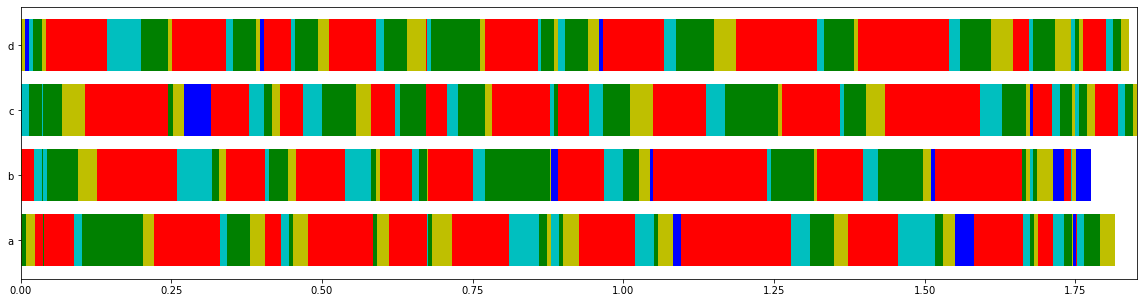

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
left_data = np.zeros(4)

label_color = {"hungry": 'y', "fork1":'b', "fork2":'r', "eating":'c', "thinking":'g'}
index = ["a", "b", "c", "d"]

all_times = [a_time, b_time, c_time, d_time]
time_series = all_times[np.array([len(ts) for ts in all_times]).argmax()]

for key, value in time_series.items():
    label = key.split(":")[-1]
#     print(label)
    
    try:
        times = np.array([all_times[0][key], all_times[1][key], all_times[2][key], all_times[3][key]])     
        

    except KeyError:
        times = []
        for i in range(4):
            if key in all_times[i]:
                times.append(all_times[i][key])
            else:
                times.append(left_data[i])
        times = np.array(times)
       
    draw_times = times- left_data
    bar_list = ax.barh(index, draw_times, left=left_data, label=label, color = label_color[label])
    left_data =  times                 

